# K-NN in python: search for the best k

## 1- Load the required modeules

In [4]:
import numpy as np                     # Llibreria matemÃƒÂ tica
import matplotlib.pyplot as plt        # Per mostrar plots
import sklearn                         # Llibreia de DM
import sklearn.datasets as ds            # Per carregar mÃƒÂ©s facilment el dataset digits
import pandas as pd
import sklearn.model_selection as cv    # Pel Cross-validation
import sklearn.neighbors as nb           # Per fer servir el knn
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.metrics import recall_score, make_scorer, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif, SelectKBest
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

%matplotlib inline                     

In [5]:
def plot_cmatrix(y_test, y_pred_test):
    confmat = confusion_matrix(y_test, y_pred_test)
    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Purples, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center',fontsize=10)
    
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
    plt.tight_layout()
    #plt.savefig('ConMatrixNB_fit_thres.png', dpi=600)
    plt.show()
    print(recall_score(y_test, y_pred_test))
    print(classification_report(y_test, y_pred_test))

## 2- Load the data

In [6]:
# Load digits dataset
data = pd.read_csv("data_balanced_normalized.csv", 
                        na_values=['NA', 'N/A'],
                        keep_default_na=False)

#sampled_data, _ = train_test_split(
 #   data,
  #  train_size=20000,
   # stratify=data['heart_attack'],
   # random_state=42

#)

# Separate data from labels
y = data['heart_attack']
X = data.drop(columns=['heart_attack'])



# Train-test split on the sampled data (BEFORE preprocessing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42 # random_state always with the same fixed value -> data split always the same; random_state = none -> each execution
    # will generate random values, and both data training and testing sets will differ for each execution
    # test_size = 0.3 -> 30% for data testing
    # For now, we keep it at 42 for reproducivility (we use 42 because it's the answer to the Ultimate Question of Life, the Universe, and Everything is 42)
)
#print(X)

## 3- Simple cross-validation

In [7]:

# Create a kNN classifier object
knc = nb.KNeighborsClassifier()

# Train the classifier
knc.fit(X_train, y_train)

# Obtain accuracy score of learned classifier on test data
print(knc.score(X_test, y_test))



0.7725104306069432


In [8]:
# More information with confussion matrix

y_pred = knc.predict(X_test)
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[28504  3261]
 [11188 20562]]


              precision    recall  f1-score   support

           0       0.72      0.90      0.80     31765
           1       0.86      0.65      0.74     31750

    accuracy                           0.77     63515
   macro avg       0.79      0.77      0.77     63515
weighted avg       0.79      0.77      0.77     63515



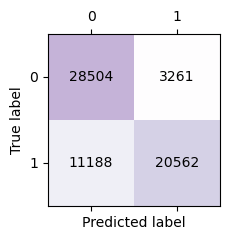

0.6476220472440944
              precision    recall  f1-score   support

           0       0.72      0.90      0.80     31765
           1       0.86      0.65      0.74     31750

    accuracy                           0.77     63515
   macro avg       0.79      0.77      0.77     63515
weighted avg       0.79      0.77      0.77     63515



In [9]:
# Obtain Recall, Precision and F-Measure for each class
from sklearn import metrics

print(metrics.classification_report(y_test, y_pred))
plot_cmatrix(y_test, y_pred)

### Let's build a one by hand to see prediction

## 4- Let's do a 10-fold cross-validation

In [10]:
# Method 1
from sklearn.model_selection import cross_val_score  
from sklearn.model_selection import cross_val_predict  
from sklearn.metrics import accuracy_score

cv_scores = cross_val_score(nb.KNeighborsClassifier(),  
                            X=X_train,  
                            y=y_train,  
                            cv=10, scoring='recall')

# cv_scores is a list with 10 accuracies (one for each validation)
print(cv_scores)

[0.64944882 0.64566929 0.64535433 0.64944882 0.64672544 0.63779528
 0.64251969 0.64125984 0.65322835 0.65385827]


In [13]:
# Let's get the mean of the 10 validations (and standard deviation of them)
print(np.mean(cv_scores))
print(np.std(cv_scores))

0.6670604344036589
0.006906832853458682


In [16]:
# Method 2
# Build confussion matrix of all 10 cross-validations
#cv = StratifiedKFold(n_splits = 10)
cv = 10
predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_train, y=y_train,  cv=10)


0.6476220472440944


In [12]:
print(sklearn.metrics.confusion_matrix(y_train, predicted))
print(sklearn.metrics.recall_score(y_train, predicted))

[[19887 11878]
 [19928 11822]]
0.3723464566929134


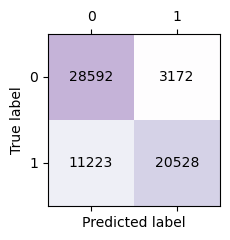

0.6465308179269944
              precision    recall  f1-score   support

           0       0.72      0.90      0.80     31764
           1       0.87      0.65      0.74     31751

    accuracy                           0.77     63515
   macro avg       0.79      0.77      0.77     63515
weighted avg       0.79      0.77      0.77     63515



In [25]:
plot_cmatrix(y_train, predicted)

## (Not yet checked) See how ammount of training data influences accuracy 

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

recall_scorer = make_scorer(recall_score, pos_label=1)

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=nb.KNeighborsClassifier(n_neighbors=3),
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.05, 1.0, 10),
                               cv=10,
                               n_jobs=-1,
                              scoring=recall_scorer)
                                

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation recall')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid(True)
plt.xlabel('Number of training samples')
plt.ylabel('Recall')
plt.legend(loc='lower right')
plt.ylim([0, 1.03])
plt.tight_layout()
plt.savefig('learning_curve.png', dpi=600)
plt.show()

## 5- Finding best features for k-NN

In [45]:
vector_of_means = np.zeros(33)
for i in range(33):
    X_new = SelectKBest(
        mutual_info_classif, k = i + 1
    ).fit_transform(X_train, y_train)
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(), 
        X = X_new,
        y = y_train, 
        cv = 5, 
        scoring = "recall"
    )
    vector_of_means[i] = np.mean(cv_scores)



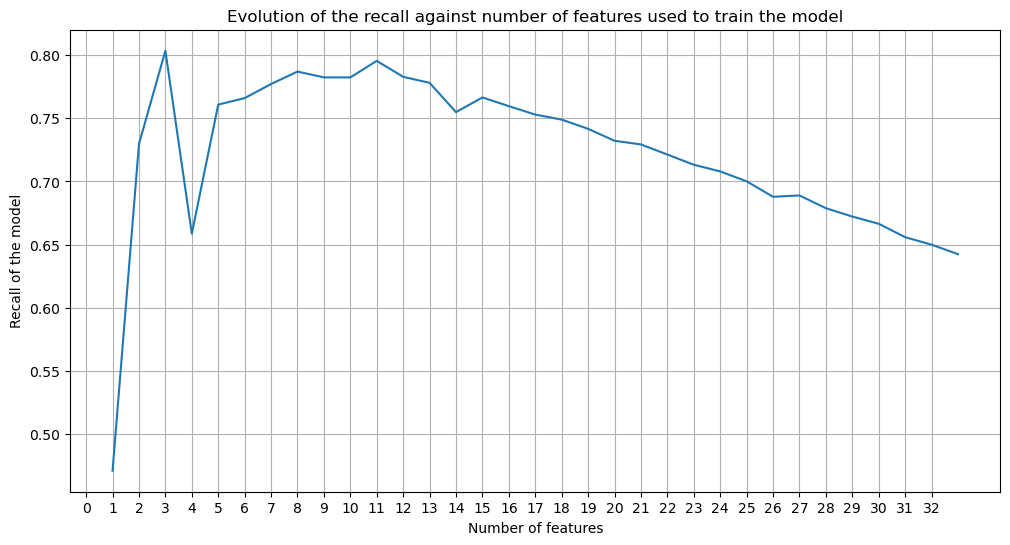

In [53]:
fig = plt.figure(figsize = (12, 6))  # Just declare the figure object and give dimensions
plt.grid(True)
plt.title("Evolution of the recall against number of features used to train the model")
plt.ylabel("Recall of the model")
plt.xlabel("Number of features")
plt.xticks(np.arange(0, 33, step=1))
plt.plot(range(1,34), vector_of_means)
plt.show()



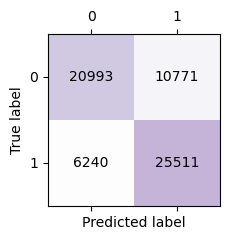

0.8034707568265567
              precision    recall  f1-score   support

           0       0.77      0.66      0.71     31764
           1       0.70      0.80      0.75     31751

    accuracy                           0.73     63515
   macro avg       0.74      0.73      0.73     63515
weighted avg       0.74      0.73      0.73     63515



In [54]:
X_new = SelectKBest(mutual_info_classif, k=3).fit_transform(X_train, y_train)

predicted = cross_val_predict(nb.KNeighborsClassifier(), X=X_new, y=y_train,  cv=5)

plot_cmatrix(y_train, predicted)

## 5- Finding best parameters for k-NN (Yet to check)

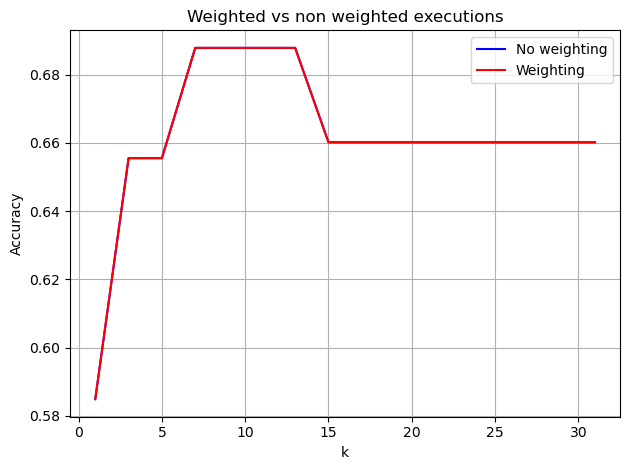

In [34]:
X_new = SelectKBest(
    mutual_info_classif, 
    k = 3
).fit_transform(X_train, y_train)

recall_scorer = make_scorer(recall_score, pos_label=1)

no_weighted_means = []
for ki in range(1,33,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(n_neighbors = ki), 
        X = X_new, 
        y = y_train, 
        cv = 10,
        scoring=recall_scorer
    )
    no_weighted_means.append(np.mean(cv_scores))

plt.plot(
    range(1,33,2),
    no_weighted_means,
    "b",
    label = "No weighting"
)

weighted_means = []
for ki in range(1,33,2):
    cv_scores = cross_val_score(
        nb.KNeighborsClassifier(
            n_neighbors = ki,
            weights = "distance"
        ), 
        X = X_new, 
        y = y_train, 
        cv = 10,
        scoring=recall_scorer
    )
    weighted_means.append(np.mean(cv_scores))
    
plt.plot(
    range(1,33,2),
    weighted_means,
    "r",
    label = "Weighting"
)

plt.title("Weighted vs non weighted executions")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.legend(loc = "upper right")
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
cv_scores = cross_val_score(
        nb.KNeighborsClassifier(n_neighbors = 7), 
        X = X_new, 
        y = y_train, 
        cv = 10,
        scoring=recall_scorer
    )



plot_cmatrix(y_test, cv_scores)

Based on the k best features that we found earlier, we now apply GridSearchCV in order to find the best parameters

In [59]:
params = {
    "n_neighbors":list(range(1,20,2)), 
    "weights":('distance','uniform')
}
knc = nb.KNeighborsClassifier()

# 1. Create a custom scorer for recall of class 1
recall_scorer = make_scorer(recall_score, pos_label=1)

# 2. Select k best features (assuming X_new and y_train are defined)
selector = SelectKBest(mutual_info_classif, k=3)
X_reduced = selector.fit_transform(X_train, y_train)
X_test_reduced = selector.transform(X_test)

# 3. Define cross-validation strategy
cv = 5

# 4. Update GridSearchCV to use recall_scorer
clf = GridSearchCV(
    knc, 
    param_grid=params, 
    cv=cv, 
    scoring="recall",  # Critical change here
    n_jobs=-1
)


Best Params = {'n_neighbors': 11, 'weights': 'distance'} Recall (Class 1) = 0.8265892481436987


### Authomatically find best parameters:

Apply models with best parameters found trained with all training data to the test set

In [ ]:
clf.fit(X_reduced, y_train)


# 5. Print results
print("Best Params =", clf.best_params_, "Recall (Class 1) =", clf.best_score_)

y_pred_test = clf.best_estimator_.predict(X_test_reduced)  # Critical fix

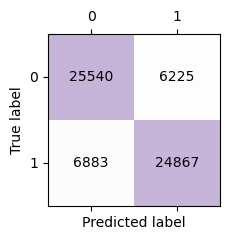

0.7832125984251969
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     31765
           1       0.80      0.78      0.79     31750

    accuracy                           0.79     63515
   macro avg       0.79      0.79      0.79     63515
weighted avg       0.79      0.79      0.79     63515



In [60]:
# Plot confusion matrix for TEST SET (y_test vs. y_pred_test)
plot_cmatrix(y_test, y_pred_test)  # Correct labels

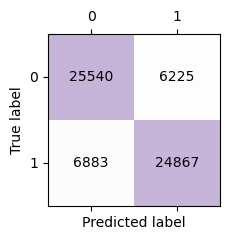

0.7832125984251969
              precision    recall  f1-score   support

           0       0.79      0.80      0.80     31765
           1       0.80      0.78      0.79     31750

    accuracy                           0.79     63515
   macro avg       0.79      0.79      0.79     63515
weighted avg       0.79      0.79      0.79     63515



In [66]:
parval=clf.best_params_
knc = nb.KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights'])
knc.fit(X_reduced, y_train)
pred=knc.predict(X_test_reduced)
plot_cmatrix(y_test, pred)

In [22]:
# interval confidence
from statsmodels.stats.proportion import proportion_confint

epsilon = sklearn.metrics.accuracy_score(y_test, pred)
print("Can approximate by Normal Distribution?: ",X_test.shape[0]*epsilon*(1-epsilon)>5)
print("Interval 95% confidence:", "{0:.3f}".format(epsilon), "+/-", "{0:.3f}".format(1.96*np.sqrt(epsilon*(1-epsilon)/X_test.shape[0])))
# or equivalent 
proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='normal')

Can approximate by Normal Distribution?:  True
Interval 95% confidence: 0.824 +/- 0.048


(0.7760164847424902, 0.8725190801110663)

In [23]:
#Using Binomial distribution

proportion_confint(count=epsilon*X_test.shape[0], nobs=X_test.shape[0], alpha=0.05, method='binom_test')

(0.7702500261379118, 0.8687427797705162)

### Mcnemar's Test implementation

In [24]:
# Build two classifiers

# Classifier 1 (3 Neighbours) successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=3), X=X, y=y,  cv=10) 
res1=np.zeros(y.shape)
res1[y_pred==y]=1

# Classifier 2 (7 Neighbours) 2 successes
y_pred = cross_val_predict(nb.KNeighborsClassifier(n_neighbors=7), X=X, y=y,  cv=10) 
res2=np.zeros(y.shape)
res2[y_pred==y]=1

# Build contingency matrix
n00 = np.sum([res1[res2==1]==1])
n11 = np.sum([res1[res2==0]==0])
n10 = np.sum([res1[res2==1]==0])
n01 = np.sum([res1[res2==0]==1])

# Chi -square test
print("Have the classifiers significant different accuracy?:",(np.abs(n01-n10)-1)**2/(n01+n10)>3.84)

Have the classifiers significant different accuracy?: True
